                        address1  \
0  No. 113, Zhongshan North Road   
1             Taipei Metro Tower   
2    No.96, Zhongshan North Road   
3     No. 125, Nanjing East Road   
4        No. 237, Songjiang Road   

                                            address2    city    zip country  \
0                       Section 2 Zhongshan District  Taipei    104  Taiwan   
1  30th and 31st Floors No.207, Tun Hwa South Roa...  Taipei  10675  Taiwan   
2                       Section 2 Zhongshan District  Taipei    104  Taiwan   
3            10th Floor Section 2 Zhongshan District  Taipei    NaN  Taiwan   
4                      15th Floor Zhongshan District  Taipei    NaN  Taiwan   

             phone              fax                           website  \
0  886 2 2531 7099  886 2 2531 6650  https://www.tccgroupholdings.com   
1  886 2 2733 8000  886 2 2736 6263            https://www.acc.com.tw   
2  886 2 2551 5211  886 2 2581 8320       https://www.chcgroup.com.tw   
3  886 2 2507 78

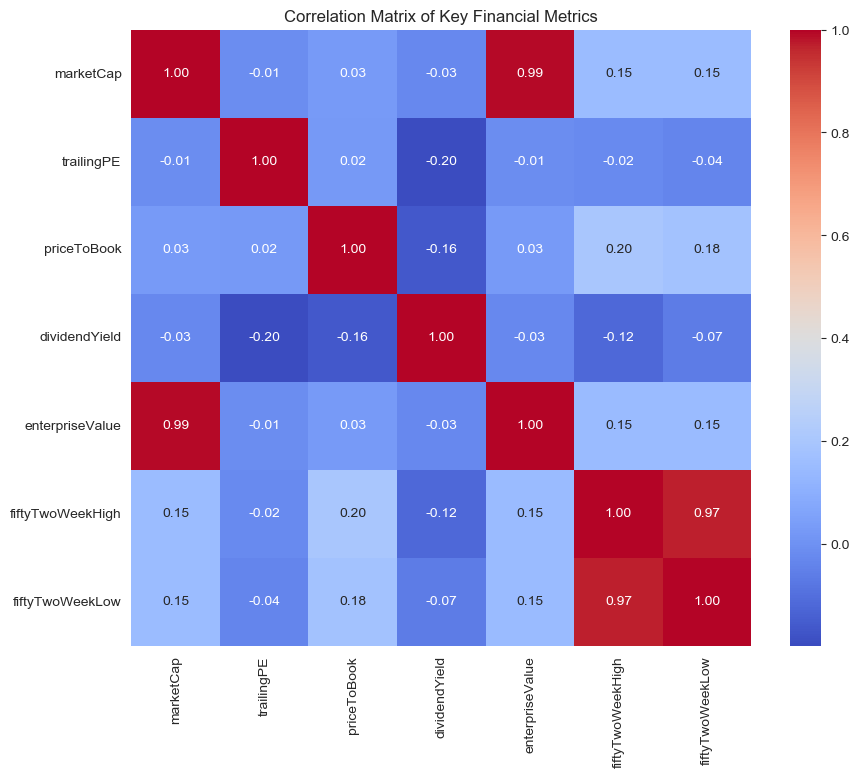

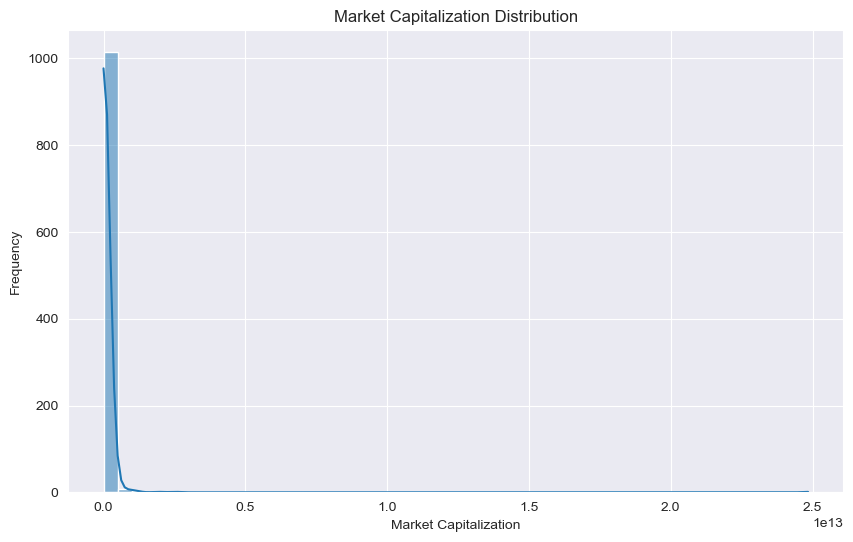

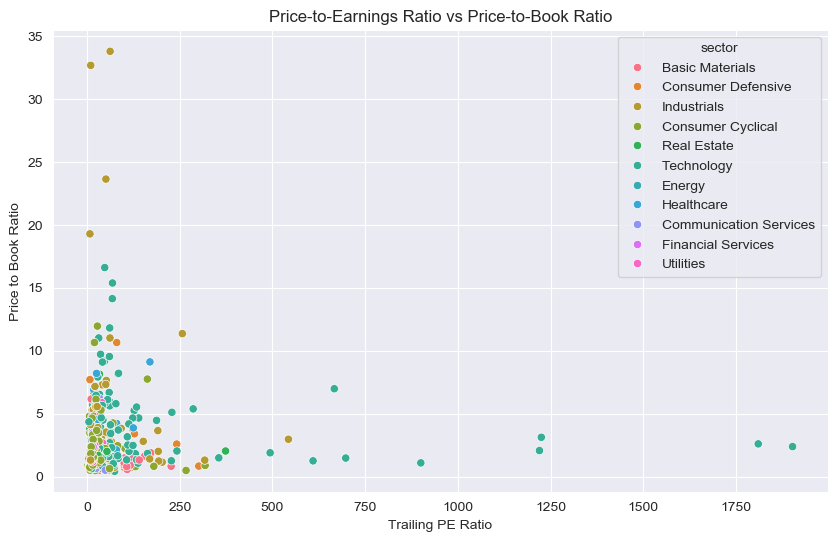

High Market Cap and Low PE Ratio Companies:
         symbol                        shortName  trailingPE     marketCap
1       1102.TW                 ASIA CEMENT CORP   13.130565  1.569353e+11
263     2303.TW         UNITED MICRO ELECTRONICS   13.270143  7.015960e+11
295     2357.TW             ASUSTEK COMPUTER INC   11.948232  3.840069e+11
316     2385.TW              CHICONY ELECTRONICS   13.845486  1.166159e+11
379     2474.TW               CATCHER TECHNOLOGY   13.300634  1.568239e+11
428     2603.TW    EVERGREEN MARINE CORP(TAIWAN)    5.605381  4.039388e+11
433     2609.TW  YANG MING MARINE TRANSPORT CORP    8.984485  2.224468e+11
434     2610.TW                  CHINA AIR LINES   14.683100  1.261315e+11
442     2618.TW                      EVA AIRWAYS    8.004587  1.884754e+11
471     2834.TW             TAIWAN BUSINESS BANK   14.814815  1.466877e+11
482     2881.TW      FUBON FINANCIAL HLDG CO LTD   14.695222  1.160938e+12
483     2882.TW         CATHAY FINANCIAL HLDG CO   11.54

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 设置 Matplotlib 的中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
plt.rcParams['axes.unicode_minus'] = False

# 读取台股公司代码
with open("stock_list.txt", "r") as file:
    stock_list = [line.strip() for line in file.readlines()]
    
# 台股上市公司的股票代码列表
# tickers 列表存储每个 Ticker 对象
tickers = [yf.Ticker(stock) for stock in stock_list]

# 用于存储所有公司基本面数据的 DataFrame
fundamental_data = pd.DataFrame()

# 获取每家公司的基本面数据
for stock in tickers:
    info = stock.info
    
    # 提取关键信息，转换为 DataFrame
    df = pd.DataFrame.from_dict(info, orient='index').T
    fundamental_data = pd.concat([fundamental_data, df], ignore_index=True)

# 保存数据到 CSV 文件（可选）
fundamental_data.to_csv('taiwan_stock_fundamentals.csv', index=False)

# 检查数据
print(fundamental_data.head())

# 分析相关特征（例如市盈率、市净率等）
# 先转换数据类型
numeric_cols = ['marketCap', 'trailingPE', 'priceToBook', 'dividendYield', 'enterpriseValue', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow']
fundamental_data[numeric_cols] = fundamental_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 相关性分析
correlation_matrix = fundamental_data[numeric_cols].corr()
print(correlation_matrix)

# 可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Financial Metrics')
plt.show()

# 可视化公司市值分布
plt.figure(figsize=(10, 6))
sns.histplot(fundamental_data['marketCap'].dropna(), bins=50, kde=True)
plt.title('Market Capitalization Distribution')
plt.xlabel('Market Capitalization')
plt.ylabel('Frequency')
plt.show()

# 可视化市盈率与市净率的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fundamental_data, x='trailingPE', y='priceToBook', hue='sector')
plt.title('Price-to-Earnings Ratio vs Price-to-Book Ratio')
plt.xlabel('Trailing PE Ratio')
plt.ylabel('Price to Book Ratio')
plt.show()

# 发现数据背后的信息
# 例如，寻找市盈率较低且市值较高的公司
valuable_stocks = fundamental_data[(fundamental_data['trailingPE'] < 15) & (fundamental_data['marketCap'] > 1e11)]
print("High Market Cap and Low PE Ratio Companies:")
print(valuable_stocks[['symbol', 'shortName', 'trailingPE', 'marketCap']])

Price-to-Book Ratio Statistics:
count    1027.000000
mean        2.683629
std         5.080878
min         0.286678
25%         1.235471
50%         1.835434
75%         2.832487
max       140.392150
Name: priceToBook, dtype: float64
Number of Missing Values in Price-to-Book Ratio: 2
Companies with Negative Price-to-Book Ratio:
Empty DataFrame
Columns: [symbol, shortName, priceToBook]
Index: []


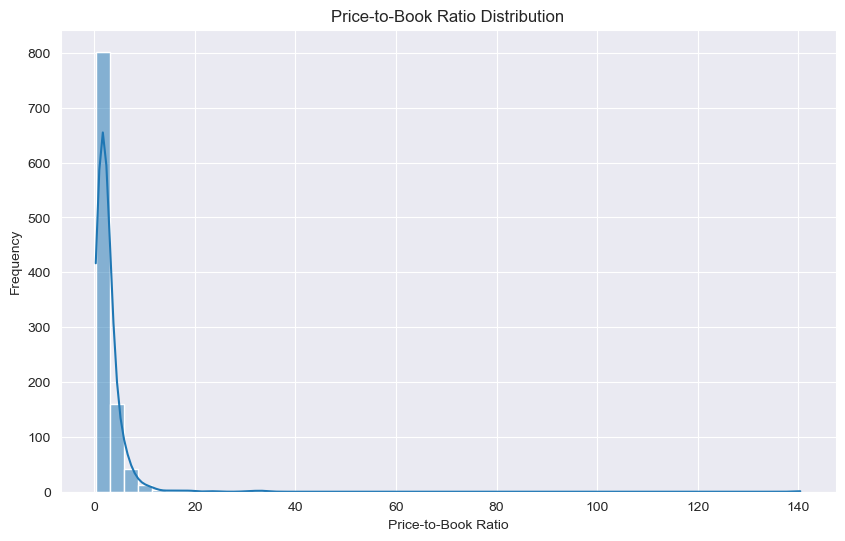

In [10]:
# 分析相关特征
numeric_cols = ['marketCap', 'trailingPE', 'priceToBook', 'dividendYield', 'enterpriseValue', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow']
fundamental_data[numeric_cols] = fundamental_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 检查 priceToBook 列的基本统计信息
print("Price-to-Book Ratio Statistics:")
print(fundamental_data['priceToBook'].describe())

# 检查是否有缺失值
print("Number of Missing Values in Price-to-Book Ratio:", fundamental_data['priceToBook'].isnull().sum())

# 筛选出 Price-to-Book Ratio 小于 0 的公司
negative_price_to_book = fundamental_data[fundamental_data['priceToBook'] < 0]
print("Companies with Negative Price-to-Book Ratio:")
print(negative_price_to_book[['symbol', 'shortName', 'priceToBook']])

# 显示 priceToBook 列的分布情况（包括 NaN）
plt.figure(figsize=(10, 6))
sns.histplot(fundamental_data['priceToBook'].dropna(), bins=50, kde=True)
plt.title('Price-to-Book Ratio Distribution')
plt.xlabel('Price-to-Book Ratio')
plt.ylabel('Frequency')
plt.show()

In [12]:
# 筛选出市净率小于 1 的公司
low_price_to_book = fundamental_data[fundamental_data['priceToBook'] < 1]
print("Companies with Price-to-Book Ratio Less Than 1:")
print(low_price_to_book[['symbol', 'shortName', 'priceToBook']])

Companies with Price-to-Book Ratio Less Than 1:
         symbol                      shortName  priceToBook
1       1102.TW               ASIA CEMENT CORP     0.882723
2       1103.TW   CHIA HSIN CEMENT CORPORATION     0.545493
3       1104.TW   UNIVERSAL CEMENT CORPORATION     0.965524
5       1109.TW         HSING TA CEMENT CO LTD     0.771203
13      1217.TW                   AGV PRODUCTS     0.781403
...         ...                            ...          ...
987   911622.TW  TYCOONS WORLDWIDE GROUP(THAI)     0.720733
993     9904.TW                       POU CHEN     0.733520
994     9905.TW   GREAT CHINA METAL INDUSTRIES     0.920502
1010    9928.TW               CHINA TELEVISION     0.507372
1024    9944.TW       SHINIH ENTERPRISE CO LTD     0.633946

[159 rows x 3 columns]


trailingPE Statistics (after cleaning):
count     827.000000
mean       46.831939
std       126.830192
min         2.476510
25%        15.032763
50%        20.783133
75%        35.387160
max      1902.500000
Name: trailingPE, dtype: float64
valuable_stocks:
         symbol                        shortName  trailingPE     marketCap
295     2357.TW             ASUSTEK COMPUTER INC   11.948232  3.840069e+11
428     2603.TW    EVERGREEN MARINE CORP(TAIWAN)    5.605381  4.039388e+11
433     2609.TW  YANG MING MARINE TRANSPORT CORP    8.984485  2.224468e+11
442     2618.TW                      EVA AIRWAYS    8.004587  1.884754e+11
483     2882.TW         CATHAY FINANCIAL HLDG CO   11.548508  9.080235e+11
484     2883.TW     KGI FINANCIAL HOLDING CO LTD   11.382978  2.701568e+11
492     2891.TW  CTBC FINANCIAL HOLDINGS COMPANY   10.433436  6.780811e+11
759     5871.TW  CHAILEASE HOLDING COMPANY LIMIT   10.548824  2.437353e+11
808     6239.TW         POWERTECH TECHNOLOGY INC   11.993382  1.083

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/3032791358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fundamental_data['trailingPE'].replace([np.inf, -np.inf], np.nan, inplace=True)


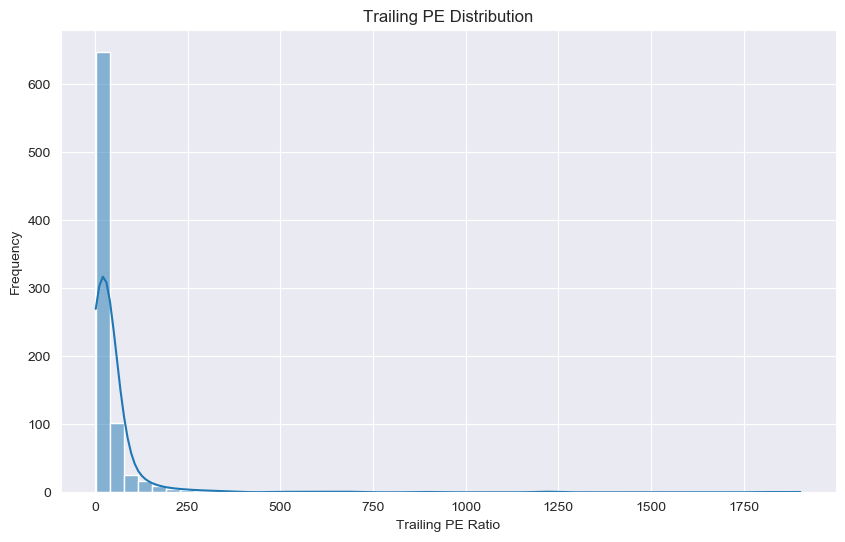

In [13]:
# 替换 inf 和 -inf 为 NaN，以便后续处理
fundamental_data['trailingPE'].replace([np.inf, -np.inf], np.nan, inplace=True)

# 删除 trailingPE 中的 NaN 行
fundamental_data.dropna(subset=['trailingPE'], inplace=True)

# 检查 trailingPE 列的基本统计信息
print("trailingPE Statistics (after cleaning):")
print(fundamental_data['trailingPE'].describe())

# 筛选出 trailingPE 小于 12 的公司且市值较高的公司
valuable_stocks = fundamental_data[(fundamental_data['trailingPE'] < 12) & (fundamental_data['marketCap'] > 1e11)]
print("valuable_stocks:")
print(valuable_stocks[['symbol', 'shortName', 'trailingPE', 'marketCap']])

# 显示 trailingPE 列的分布情况
plt.figure(figsize=(10, 6))
sns.histplot(fundamental_data['trailingPE'].dropna(), bins=50, kde=True)
plt.title('Trailing PE Distribution')
plt.xlabel('Trailing PE Ratio')
plt.ylabel('Frequency')
plt.show()

In [14]:
# 获取更多财务数据
detailed_data = pd.DataFrame()

for ticker in valuable_stocks['symbol']:
    stock = yf.Ticker(ticker)
    info = stock.info
    # 提取更多关键信息
    data = {
        'symbol': ticker,
        'shortName': info.get('shortName'),
        'trailingPE': info.get('trailingPE'),
        'marketCap': info.get('marketCap'),
        'dividendYield': info.get('dividendYield'),
        'profitMargins': info.get('profitMargins'),
        'revenueGrowth': info.get('revenueGrowth'),
        'netIncomeToCommon': info.get('netIncomeToCommon')
    }
    df = pd.DataFrame(data, index=[0])
    detailed_data = pd.concat([detailed_data, df], ignore_index=True)

# 保存数据到 CSV 文件（可选）
detailed_data.to_csv('detailed_fundamentals.csv', index=False)

# 显示详细财务数据
print(detailed_data.head())

    symbol                        shortName  trailingPE     marketCap  \
0  2357.TW             ASUSTEK COMPUTER INC   11.948232  384006914048   
1  2603.TW    EVERGREEN MARINE CORP(TAIWAN)    5.605381  403938770944   
2  2609.TW  YANG MING MARINE TRANSPORT CORP    8.984485  222446780416   
3  2618.TW                      EVA AIRWAYS    8.004587  188475359232   
4  2882.TW         CATHAY FINANCIAL HLDG CO   11.548508  908023496704   

   dividendYield  profitMargins  revenueGrowth  netIncomeToCommon  
0         0.0329        0.06185          0.252        32275599360  
1         0.0531        0.21348          0.578        72043216896  
2         0.0314        0.15011          0.501        24769542144  
3         0.0516        0.11023          0.139        23656003584  
4         0.0323        0.10759         -0.362        78651318272  


Industry Distribution:
industry
Marine Shipping                        2
Insurance - Life                       2
Computer Hardware                      1
Airlines                               1
Banks - Regional                       1
Credit Services                        1
Semiconductor Equipment & Materials    1
Packaged Foods                         1
Footwear & Accessories                 1
Engineering & Construction             1
Name: count, dtype: int64


/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/3612230484.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')


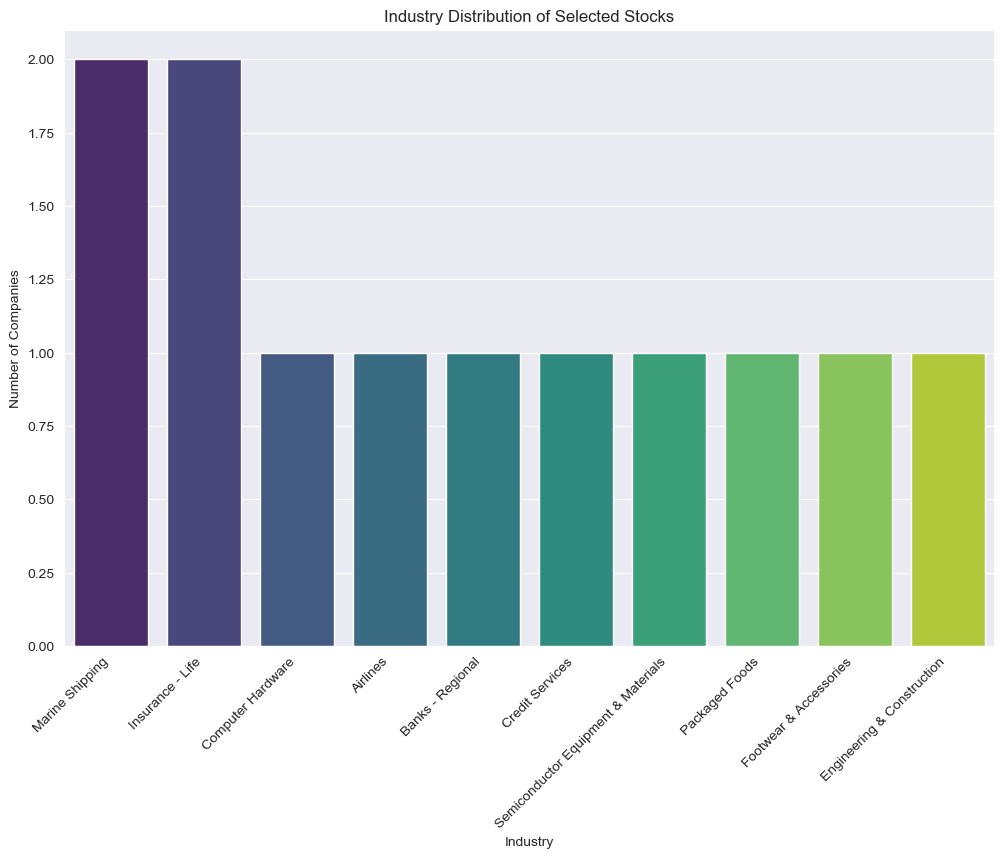

In [15]:
# 获取每家公司所属行业
industry_data = pd.DataFrame()

for ticker in valuable_stocks['symbol']:
    stock = yf.Ticker(ticker)
    info = stock.info
    data = {
        'symbol': ticker,
        'shortName': info.get('shortName'),
        'sector': info.get('sector'),
        'industry': info.get('industry')
    }
    df = pd.DataFrame(data, index=[0])
    industry_data = pd.concat([industry_data, df], ignore_index=True)

# 计算行业分布
industry_distribution = industry_data['industry'].value_counts()
print("Industry Distribution:")
print(industry_distribution)

# 可视化行业分布
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_distribution.index, y=industry_distribution.values, palette='viridis')
plt.title('Industry Distribution of Selected Stocks')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

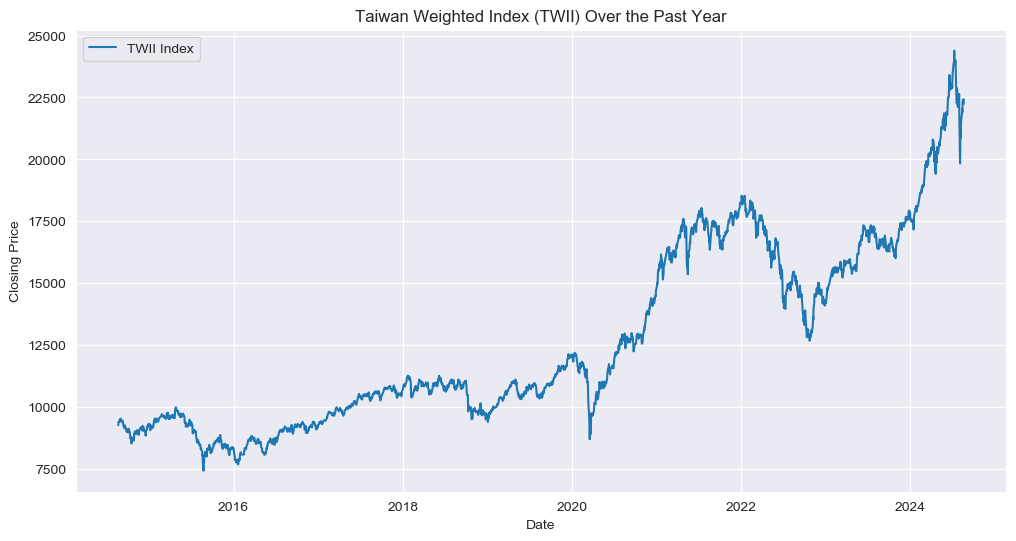

In [17]:
# 获取台湾加权指数数据
index = yf.Ticker('^TWII')
index_data = index.history(period='10y')  # 获取过去一年数据

# 可视化台湾加权指数
plt.figure(figsize=(12, 6))
plt.plot(index_data.index, index_data['Close'], label='TWII Index')
plt.title('Taiwan Weighted Index (TWII) Over the Past Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

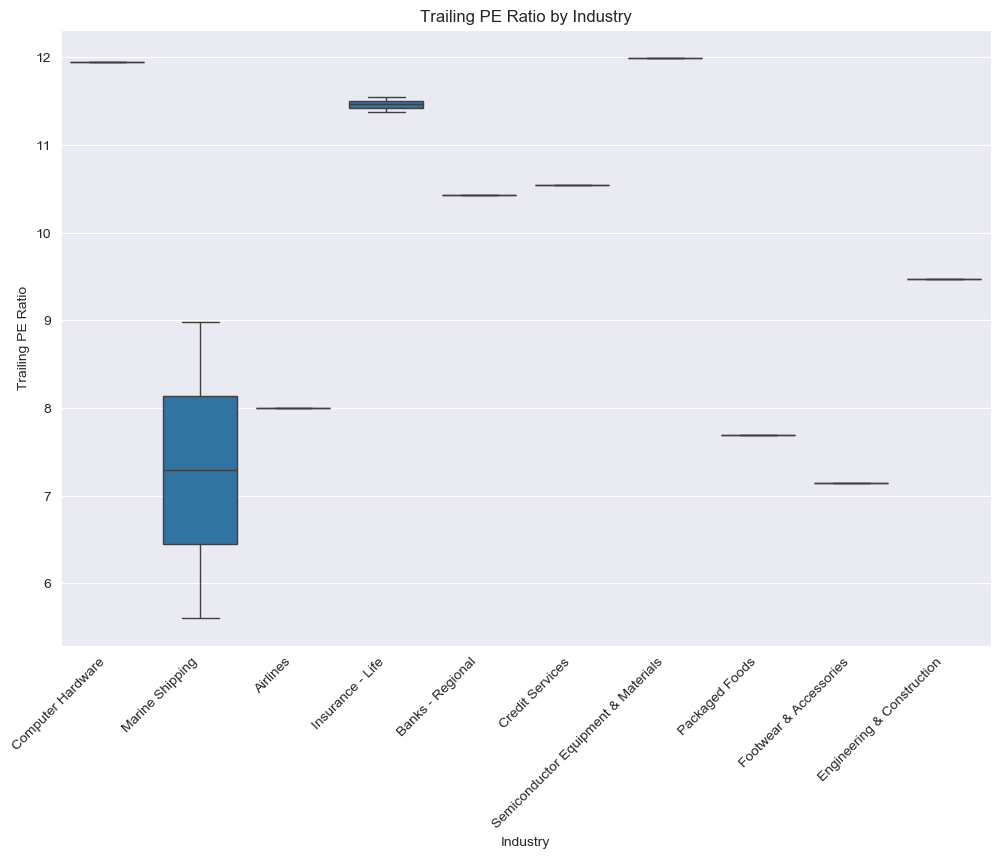

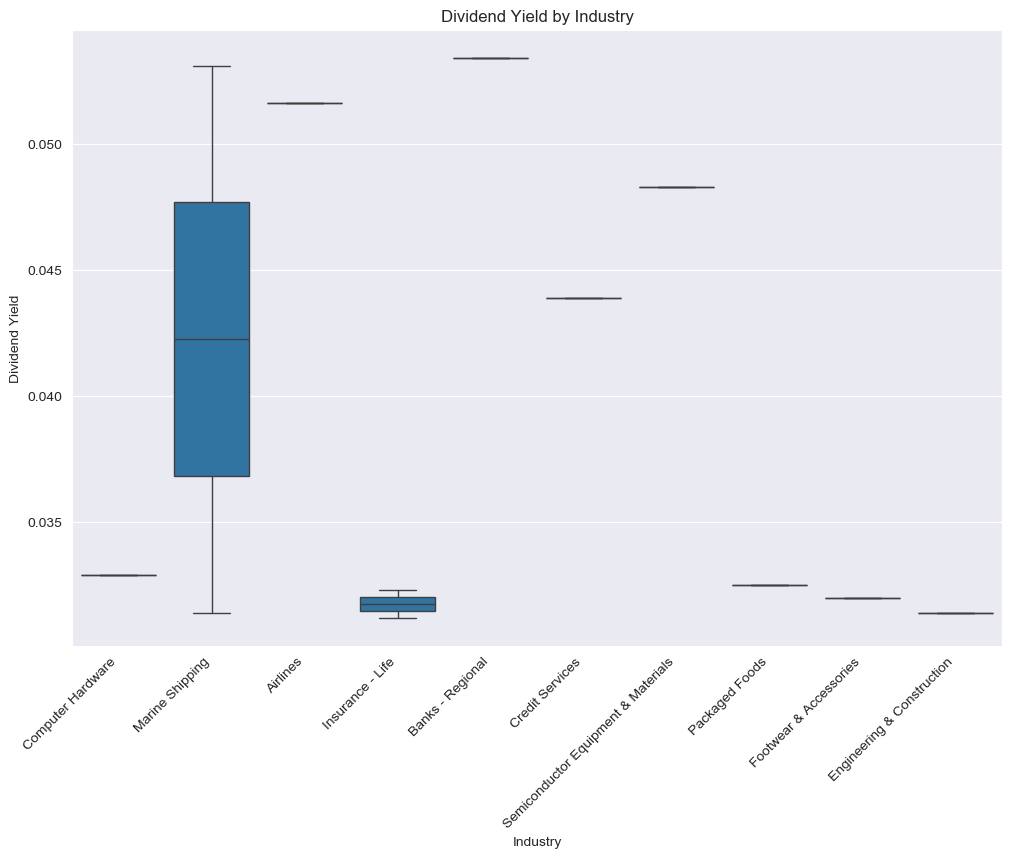

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设已经有 detailed_data 和 industry_data DataFrame

# 合并财务数据和行业数据
combined_data = pd.merge(detailed_data, industry_data, on='symbol')

# 可视化不同行业的市盈率（Trailing PE Ratio）
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='trailingPE', data=combined_data)
plt.title('Trailing PE Ratio by Industry')
plt.xlabel('Industry')
plt.ylabel('Trailing PE Ratio')
plt.xticks(rotation=45, ha='right')
plt.show()

# 可视化不同行业的股息收益率
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='dividendYield', data=combined_data)
plt.title('Dividend Yield by Industry')
plt.xlabel('Industry')
plt.ylabel('Dividend Yield')
plt.xticks(rotation=45, ha='right')
plt.show()

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/4113076372.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_data = index_data.resample('M').mean()
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/4113076372.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = yf.Ticker(ticker).history(period='1y').resample('M').mean()
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/4113076372.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = yf.Ticker(ticker).history(period='1y').resample('M').mean()
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/4113076372.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_data = yf.Ticker(ticker).history(period='1y').resample('M').mean()
/

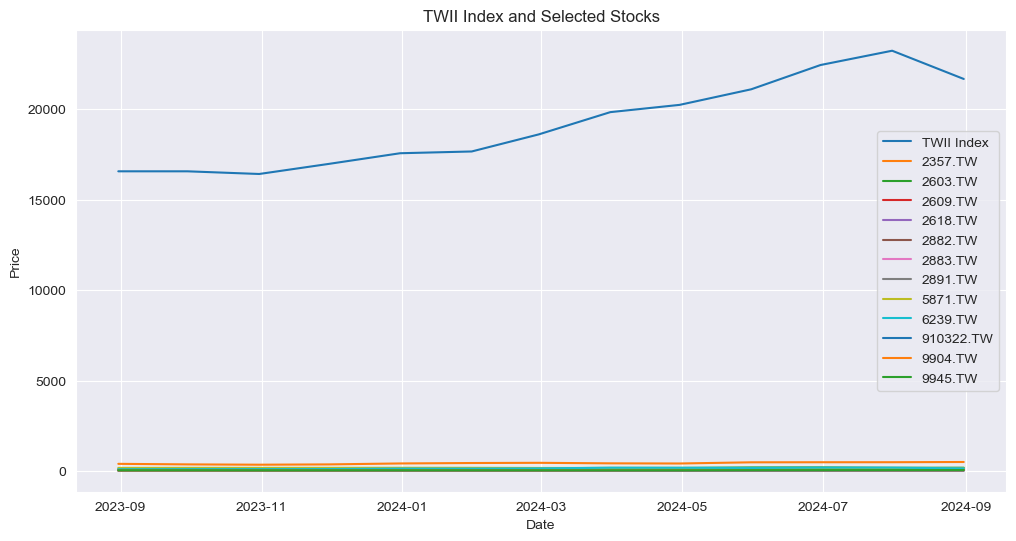

In [19]:
import yfinance as yf

# 获取台湾加权指数数据
index = yf.Ticker('^TWII')
index_data = index.history(period='1y')  # 获取过去一年数据

# 将索引数据重采样为月度数据，以便更容易与财务数据对齐
index_data = index_data.resample('M').mean()

# 假设 detailed_data 有公司市盈率数据，并且有时间戳
# 这里需要将市盈率与时间数据结合起来
# 示例中不包含时间数据，需要自行添加

# 可视化台湾加权指数与市盈率的关系
plt.figure(figsize=(12, 6))
plt.plot(index_data.index, index_data['Close'], label='TWII Index')
for ticker in valuable_stocks['symbol']:
    stock_data = yf.Ticker(ticker).history(period='1y').resample('M').mean()
    plt.plot(stock_data.index, stock_data['Close'], label=ticker)
plt.title('TWII Index and Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ConversionError: Failed to convert value(s) to axis units: Index(['Airlines', 'Banks - Regional', 'Computer Hardware', 'Credit Services',
       'Engineering & Construction', 'Footwear & Accessories',
       'Insurance - Life', 'Marine Shipping', 'Packaged Foods',
       'Semiconductor Equipment & Materials'],
      dtype='object', name='industry')

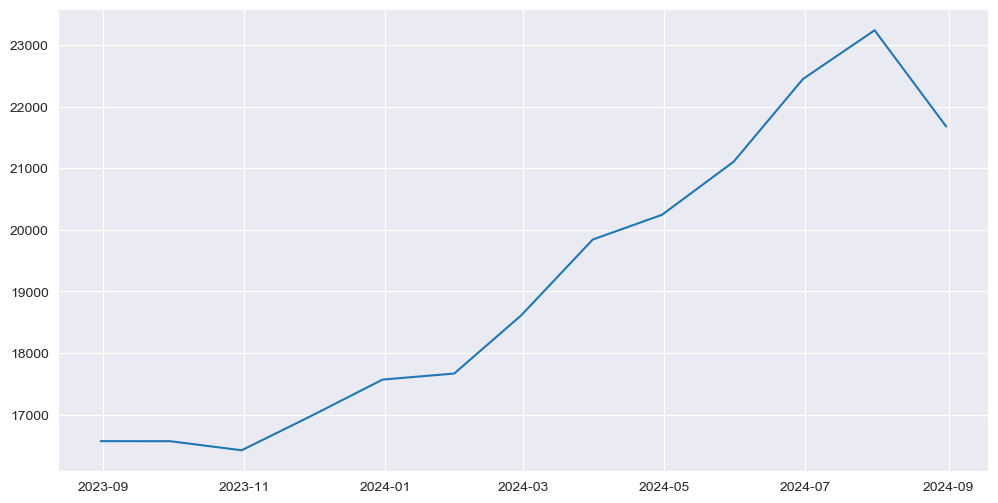

In [20]:
# 获取每个行业的市值数据
industry_market_cap = combined_data.groupby('industry')['marketCap'].sum()

# 获取台湾加权指数数据并计算行业市值的变化
plt.figure(figsize=(12, 6))
plt.plot(index_data.index, index_data['Close'], label='TWII Index')
plt.bar(industry_market_cap.index, industry_market_cap.values, label='Industry Market Cap')
plt.title('TWII Index and Industry Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/2903929881.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_data = index_data.resample('M').mean()


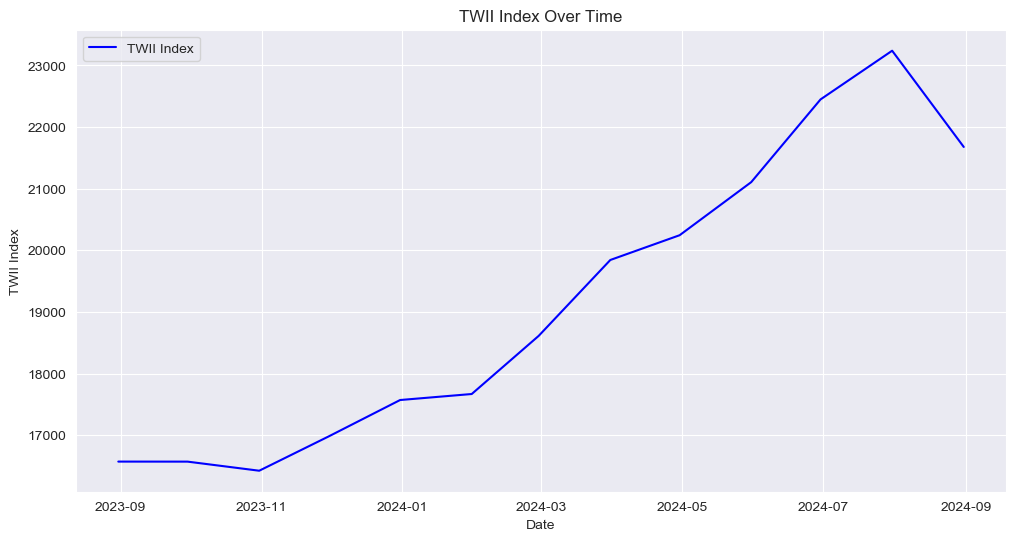

In [21]:
import yfinance as yf

# 获取台湾加权指数数据
index = yf.Ticker('^TWII')
index_data = index.history(period='1y')  # 获取过去一年数据

# 将索引数据重采样为月度数据，以便更容易与财务数据对齐
index_data = index_data.resample('M').mean()

# 绘制 TWII 指数
plt.figure(figsize=(12, 6))
plt.plot(index_data.index, index_data['Close'], label='TWII Index', color='blue')
plt.title('TWII Index Over Time')
plt.xlabel('Date')
plt.ylabel('TWII Index')
plt.legend()
plt.show()

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_37554/1231493710.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_market_cap.index, y=industry_market_cap.values, palette='viridis')


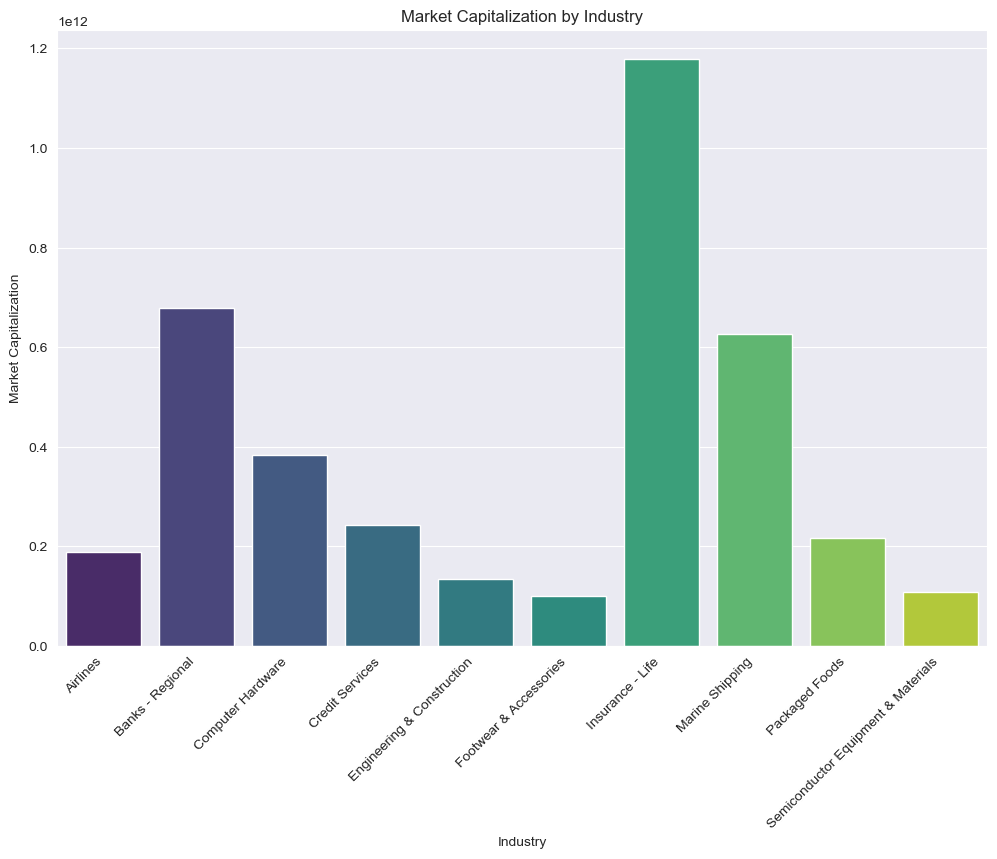

In [22]:
# 计算每个行业的市值
industry_market_cap = combined_data.groupby('industry')['marketCap'].sum()

# 绘制行业市值分布
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_market_cap.index, y=industry_market_cap.values, palette='viridis')
plt.title('Market Capitalization by Industry')
plt.xlabel('Industry')
plt.ylabel('Market Capitalization')
plt.xticks(rotation=45, ha='right')
plt.show()

ConversionError: Failed to convert value(s) to axis units: Index(['Footwear & Accessories', 'Semiconductor Equipment & Materials',
       'Engineering & Construction', 'Airlines', 'Packaged Foods',
       'Credit Services', 'Computer Hardware', 'Marine Shipping',
       'Banks - Regional', 'Insurance - Life'],
      dtype='object', name='industry')

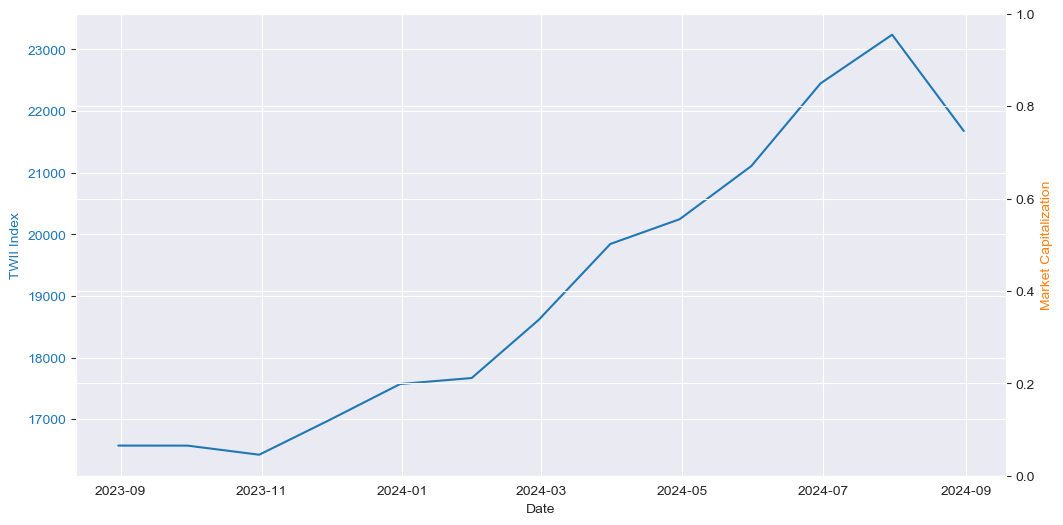

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 TWII 指数
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('TWII Index', color=color)
ax1.plot(index_data.index, index_data['Close'], color=color, label='TWII Index')
ax1.tick_params(axis='y', labelcolor=color)

# 创建第二个 y 轴
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Market Capitalization', color=color)

# 由于行业是分类数据，创建适当的条形图
industry_market_cap = combined_data.groupby('industry')['marketCap'].sum()
industry_market_cap = industry_market_cap.sort_values()  # 排序以便于可视化

# 使用适当的 bar plot 处理分类数据
ax2.bar(industry_market_cap.index, industry_market_cap.values, color=color, alpha=0.3, label='Industry Market Cap')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('TWII Index and Industry Market Capitalization')
plt.show()

In [24]:
print(index_data.head())
print(industry_market_cap.head())
print(combined_data['industry'].unique())

                                   Open          High           Low  \
Date                                                                  
2023-08-31 00:00:00+08:00  16560.534288  16649.224392  16513.357639   
2023-09-30 00:00:00+08:00  16576.999414  16643.597363  16504.138623   
2023-10-31 00:00:00+08:00  16437.917822  16504.295068  16354.689014   
2023-11-30 00:00:00+08:00  16926.630282  17019.745872  16890.922141   
2023-12-31 00:00:00+08:00  17550.552827  17614.874721  17507.034970   

                                  Close        Volume  Dividends  Stock Splits  
Date                                                                            
2023-08-31 00:00:00+08:00  16570.632161  3.144522e+06        0.0           0.0  
2023-09-30 00:00:00+08:00  16569.903564  2.771545e+06        0.0           0.0  
2023-10-31 00:00:00+08:00  16422.404590  2.742445e+06        0.0           0.0  
2023-11-30 00:00:00+08:00  16977.863947  2.992195e+06        0.0           0.0  
2023-12-31 00:00

In [29]:

import pandas as pd
import matplotlib.pyplot as plt

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')
# 定义画图函数
def plot_data(data, title):
    d = dict(data)
    plt.figure(figsize=(8, 5))
    fig = plt.bar(d.keys(), d.values())
    autolabel(fig)  # 确保 autolabel 函数在你的代码中定义或导入
    plt.title(title, fontsize=15)
    plt.ylim(0, max(d.values()) * 1.1)
    plt.show()

# 示例 DataFrame（请用实际数据替换）
# df = pd.DataFrame({
#     'industry': ['Tech', 'Healthcare', 'Finance', 'Energy', 'Utilities', 'Materials', 'Consumer Discretionary', 'Consumer Staples', 'Communication Services', 'Real Estate'],
#     'PE': [10, 15, 8, 12, 9, 14, 11, 13, 16, 7]
# })

# 检查 DataFrame 列名
print(df.columns)

# 查看十大最低市盈率行业
pe_ind = df.groupby('industry')['trailingPE'].mean()  # 使用正确的列名
pe = pe_ind.sort_values()[:10].round(2)
title = '十大最低市盈率行业'
plot_data(pe, title)

Index(['symbol', 'shortName', 'sector', 'industry'], dtype='object')


KeyError: 'Column not found: trailingPE'

In [31]:
# 假设数据框中有 'industry' 列和 'trailingPE' 列
if 'industry' in fundamental_data.columns and 'trailingPE' in fundamental_data.columns:
    # 计算每个行业的平均市盈率
    pe_industry = fundamental_data.groupby('industry')['trailingPE'].mean()
    # 按市盈率排序，选择市盈率最低的十大行业
    pe_lowest_10_industries = pe_industry.sort_values().head(10).round(2)
    print(pe_lowest_10_industries)
else:
    print("数据框中缺少 'industry' 或 'trailingPE' 列。")

industry
Insurance - Diversified              5.66
Insurance - Reinsurance              7.54
Real Estate - Diversified            7.76
Insurance - Property & Casualty      9.09
Airlines                            10.60
Other Industrial Metals & Mining    11.09
Industrial Distribution             11.45
Education & Training Services       11.83
Marine Shipping                     12.96
Consulting Services                 13.18
Name: trailingPE, dtype: float64


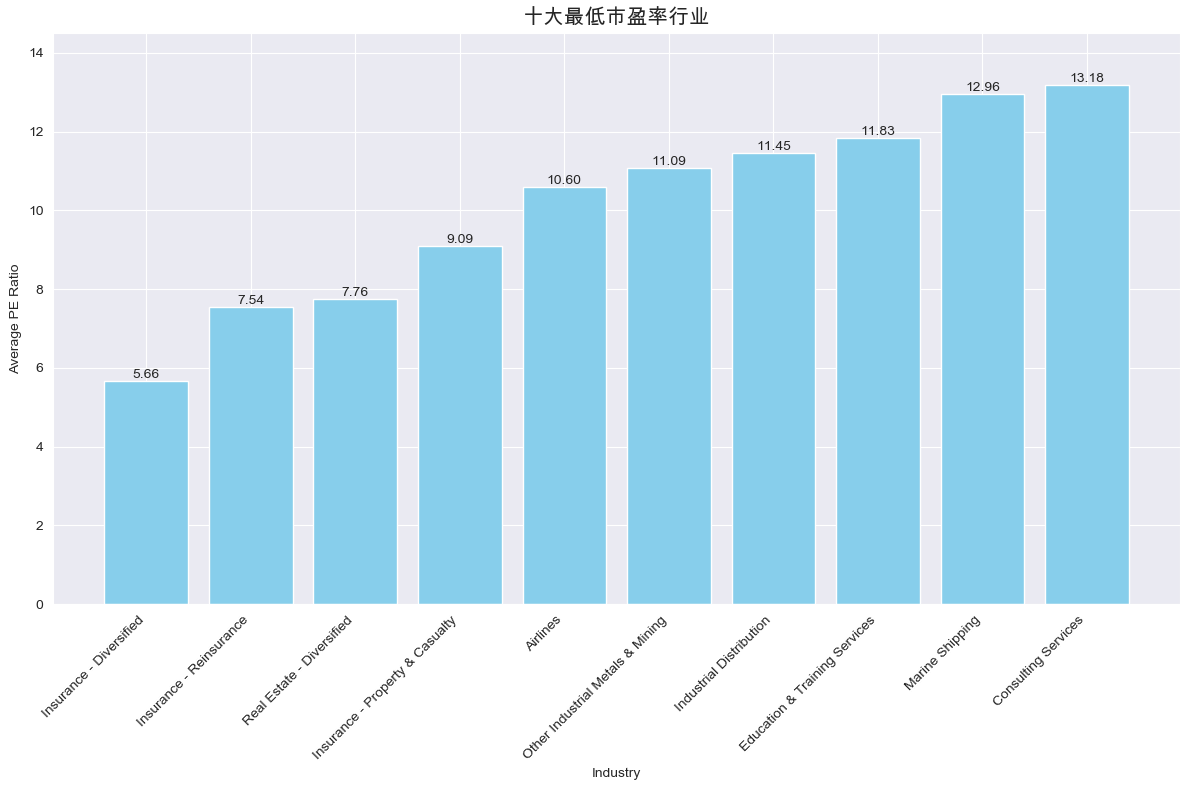

In [32]:
import matplotlib.pyplot as plt

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, f'{height:.2f}', ha='center', va='bottom')

def plot_pe_by_industry(data, title):
    """Plot a bar chart of PE ratios by industry."""
    d = dict(data)
    plt.figure(figsize=(12, 8))
    bars = plt.bar(d.keys(), d.values(), color='skyblue')
    autolabel(bars)
    plt.title(title, fontsize=15)
    plt.xlabel('Industry')
    plt.ylabel('Average PE Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(d.values()) * 1.1)
    plt.tight_layout()
    plt.show()

# 绘制市盈率最低的十大行业图表
plot_pe_by_industry(pe_lowest_10_industries, '十大最低市盈率行业')